In [1]:
# Importar las librerías necesarias
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [3]:
# Cargar el dataset
df = pd.read_csv('Titanic-Dataset.csv')

In [5]:
#Análisis Exploratorio de Datos
df.shape
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
## Resumen estadístico de las variables numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Comprobar valores nulos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

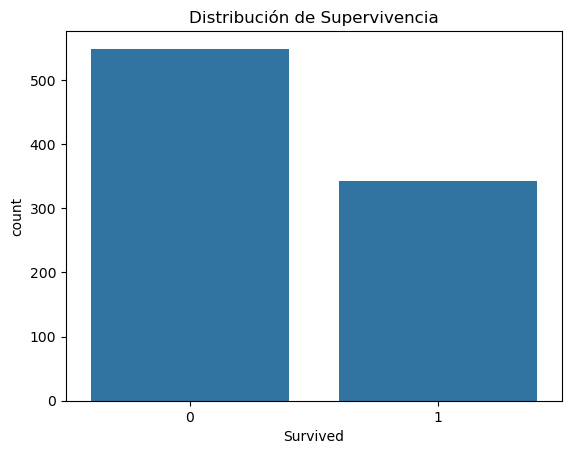

In [11]:
# Distribución de la variable objetivo
sns.countplot(x='Survived', data=df)
plt.title("Distribución de Supervivencia")
plt.show()

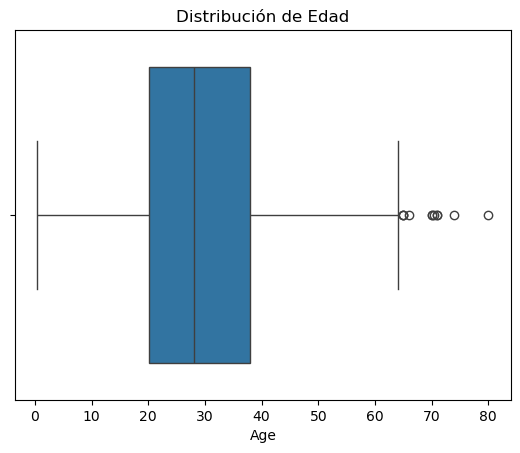

In [13]:
# Diagrama de caja para identificar valores atípicos en 'Age'
sns.boxplot(x=df['Age'])
plt.title("Distribución de Edad")
plt.show()

In [15]:
#Preprocesamiento de Datos
# Imputar valores faltantes
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [17]:
# Transformación de variables categóricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [19]:
# Escalado de variables numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [21]:
# Verificar datos preprocesados
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.592481      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.638789      1      0   
2                             Heikkinen, Miss. Laina -0.284663      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.407926      1      0   
4                           Allen, Mr. William Henry  0.407926      0      0   

             Ticket      Fare Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445   NaN      True       False        True  
1          PC 17599  0.786845   C85     False       False       False  
2  STON/O2. 3101282 -0.488854   NaN     False       False        True  
3            1

In [23]:
# Seleccionar características relevantes
features = ['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

print("Características seleccionadas:", features)

Características seleccionadas: ['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


In [25]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (712, 6)
Tamaño del conjunto de prueba: (179, 6)


In [27]:
# Entrenar el modelo
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("Modelo entrenado.")

Modelo entrenado.


Precisión: 0.7988826815642458
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



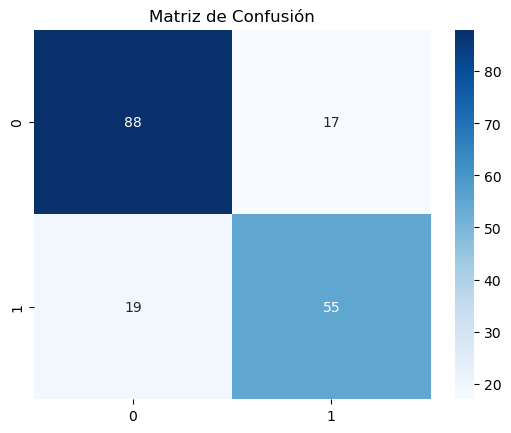

In [29]:
# Predicciones
y_pred = model.predict(X_test)

# Métricas de evaluación
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

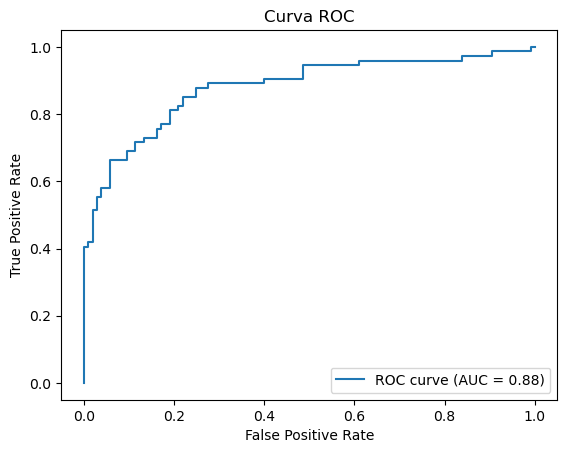

In [31]:
# Curva ROC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc='lower right')
plt.show()

In [33]:
coefficients = pd.DataFrame(model.coef_[0], index=features, columns=["Coeficiente"])
print(coefficients)

            Coeficiente
Pclass        -1.007476
Age           -0.325208
Fare           0.016145
Sex_male      -2.457719
Embarked_Q    -0.085601
Embarked_S    -0.519831
